In [4]:
import numpy as np
import pandas as pd
import warnings

In [6]:
warnings.filterwarnings('ignore')

# 1. Import Data

In [121]:
ourdata = pd.read_csv('/Users/hfakhrav/Desktop/take_home_ss_ratings.csv', sep = ',')
print(ourdata)

         user_id quiz_type  quiz_number  question_number  item_id  rating
0              0    random            0                0       45       1
1              0    random            0                1      734       1
2              0    random            0                2     4145       1
3              0    random            0                3     3231       0
4              0    random            0                4      361       1
...          ...       ...          ...              ...      ...     ...
1116365    19999    random            5               55     3324       0
1116366    19999    random            5               56     3681       0
1116367    19999    random            5               57     2731       0
1116368    19999    random            5               58     1442       0
1116369    19999    random            5               59     2697       1

[1116370 rows x 6 columns]


In [8]:
ourdata.head()

,user_id,quiz_type,quiz_number,question_number,item_id,rating
0,0,random,0,0,45,1
1,0,random,0,1,734,1
2,0,random,0,2,4145,1
3,0,random,0,3,3231,0
4,0,random,0,4,361,1


In [9]:
ourdata.shape

(1116370, 6)

In [10]:
print('Total data')
print('_'*50)
print('\nTotal num of rating: ', ourdata.shape[0])
print('Total num of User:', len(np.unique(ourdata.user_id)))
print('Total num of Items: ' , len(np.unique(ourdata.item_id)))

Total data
__________________________________________________

Total num of rating:  1116370
Total num of User: 20000
Total num of Items:  5000


In [11]:
ourdata.drop(ourdata.columns[1], axis=1, inplace=True)

In [12]:
ourdata.drop(ourdata.columns[1], axis=1, inplace=True)

In [13]:
ourdata.drop(ourdata.columns[1], axis=1, inplace=True)

In [14]:
print(ourdata)

         user_id  item_id  rating
0              0       45       1
1              0      734       1
2              0     4145       1
3              0     3231       0
4              0      361       1
...          ...      ...     ...
1116365    19999     3324       0
1116366    19999     3681       0
1116367    19999     2731       0
1116368    19999     1442       0
1116369    19999     2697       1

[1116370 rows x 3 columns]


# 2.  Exploratory Data

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [21]:
ourdata.groupby('item_id').mean()['rating'].sort_values(ascending = False).head()

item_id
654     0.958457
1881    0.950581
3821    0.948640
1890    0.946108
4195    0.939633
Name: rating, dtype: float64

In [26]:
ourdata.groupby('item_id').count()['rating'].sort_values(ascending = False)

item_id
1279    406
1540    403
1253    400
2582    395
3531    394
       ... 
3169    122
3197    122
4102    121
4129    120
1619    119
Name: rating, Length: 5000, dtype: int64

In [29]:
ratings = pd.DataFrame(ourdata.groupby('item_id').mean()['rating'])

In [31]:
 ratings.head()

,rating
item_id,
0,0.466258
1,0.524590
2,0.433735
3,0.295597
4,0.390533


In [32]:
ratings['num of ratings']=pd.DataFrame(ourdata.groupby('item_id').count()['rating'])

In [34]:
ratings.sort_values(by='rating',ascending = False)

,rating,num of ratings
item_id,,
654,0.958457,337
1881,0.950581,344
3821,0.948640,331
1890,0.946108,334
4195,0.939633,381
...,...,...
1779,0.063830,141
675,0.051282,156
3231,0.046784,171


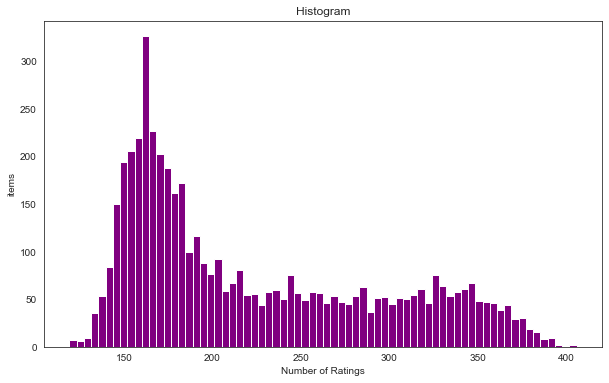

In [41]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'], bins = 70 , color = 'purple')
plt.title('Histogram')
plt.xlabel('Number of Ratings')
plt.ylabel('items')
plt.show()

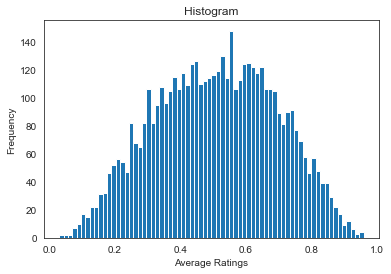

In [44]:
plt.hist(ratings['rating'], bins=70)
plt.title('Histogram')
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
plt.show()

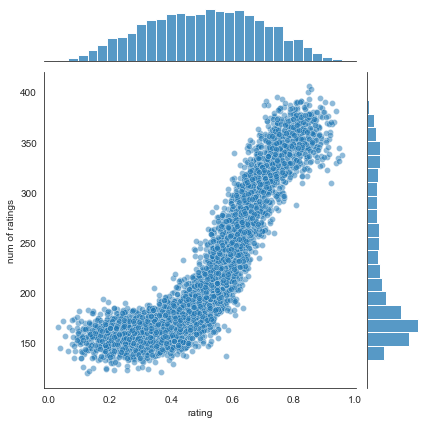

In [45]:
sns.jointplot(x= 'rating', y='num of ratings' , data= ratings , alpha=0.5)

# 3. Recommendation

In [47]:
ourdata.head()

,user_id,item_id,rating
0,0,45,1
1,0,734,1
2,0,4145,1
3,0,3231,0
4,0,361,1


In [49]:
user_item_matrix = ourdata.pivot_table(index = 'user_id', columns='item_id', values = 'rating')
user_item_matrix

item_id,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
ratings.sort_values('num of ratings', ascending = False).head()

,rating,num of ratings
item_id,,
1279,0.849754,406
1540,0.856079,403
1253,0.847500,400
2582,0.746835,395
3531,0.885787,394


In [82]:
one_item = user_item_matrix[1279]
one_item.head()

user_id
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 1279, dtype: float64

In [83]:
similar_to_one_item = user_item_matrix.corrwith(one_item) #correlation between one item between other items

In [84]:
similar_to_one_item

item_id
0            NaN
1            NaN
2      -0.500000
3      -0.577350
4       0.500000
          ...   
4995    0.447214
4996   -0.149071
4997         NaN
4998   -0.166667
4999         NaN
Length: 5000, dtype: float64

In [85]:
Corr_of_one_item = pd.DataFrame(similar_to_one_item, columns = ['correlation'])

In [86]:
Corr_of_one_item2 = Corr_of_one_item.dropna()
Corr_of_one_item2

,correlation
item_id,
2,-0.500000
3,-0.577350
4,0.500000
5,0.348651
6,0.666667
...,...
4993,0.399292
4994,0.577350
4995,0.447214


In [87]:
Corr_of_one_item2.sort_values('correlation', ascending = False)

,correlation
item_id,
1450,1.0
4742,1.0
4756,1.0
3188,1.0
2516,1.0
...,...
2761,-1.0
1121,-1.0
4934,-1.0


In [88]:
Corr_with_oneitem = Corr_of_one_item2.join(ratings['num of ratings'])
Corr_with_oneitem.head()

,correlation,num of ratings
item_id,,
2,-0.500000,166
3,-0.577350,159
4,0.500000,169
5,0.348651,312
6,0.666667,175


In [89]:
Corr_with_oneitem[Corr_with_oneitem['num of ratings'] > 350 ].sort_values('correlation', ascending = False)

,correlation,num of ratings
item_id,,
1279,1.000000,406
2614,1.000000,363
3188,1.000000,391
4606,1.000000,378
66,1.000000,390
...,...,...
2343,-0.323875,363
3803,-0.353553,371
3650,-0.356348,358


# 4.Predict

In [92]:
def predict_item(item_id):
    item_user_rating = user_item_matrix[item_id]
    similar_to_item = user_item_matrix.corrwith(item_user_rating)
    Corr_of_item = pd.DataFrame(similar_to_item, columns = ['correlation'])
    Corr_of_item2 = Corr_of_item.dropna
    Corr_with_item = Corr_of_item2.join(ratings['num of ratings'])
    predictions =  Corr_with_item[Corr_with_item['num of ratings'] > 350 ].sort_values('correlation', ascending = False)
    
    return predictions
    

In [93]:
predict_item('1279')

KeyError: '1279'

In [97]:
item_user_rating = user_item_matrix[10]
item_user_rating

user_id
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
19995   NaN
19996   NaN
19997   NaN
19998   NaN
19999   NaN
Name: 10, Length: 20000, dtype: float64

In [100]:
user_item_matrix.head()

item_id,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
def predict_item(item_id):
    item_user_rating = user_item_matrix[item_id]
    similar_to_item = user_item_matrix.corrwith(item_user_rating)
    Corr_of_item = pd.DataFrame(similar_to_item, columns = ['correlation'])
    Corr_of_item2 = Corr_of_item.dropna()
    Corr_with_item = Corr_of_item2.join(ratings['num of ratings'])
    predictions =  Corr_with_item[Corr_with_item['num of ratings'] > 350 ].sort_values(['correlation','num of ratings'], ascending = [False,False])
    
    return predictions
    

In [139]:
predict_item(1279)

,correlation,num of ratings
item_id,,
1279,1.000000,406
3188,1.000000,391
66,1.000000,390
4606,1.000000,378
4756,1.000000,367
...,...,...
2343,-0.323875,363
3803,-0.353553,371
3650,-0.356348,358
